# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [77]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [78]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [37]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


E:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


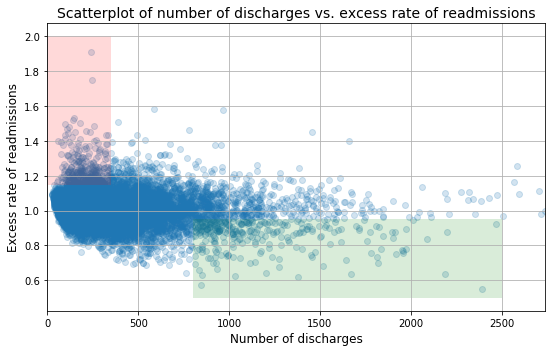

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
# Your turn

In [7]:
#Before everything, I just want to look at what the data looks like
clean_hospital_read_df.head(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


### A. Initial observations based on the plot above

1. Overall, rate of readmissions is trending down with increasing number of discharges
2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

For 1) the scatter plot looks very messy, and I'm not sure if there's actually a correlation beneath all that noise. Thus, I calculated the pearson correlation coefficient to see if there is an actual correlation between rate of readmissions and discharges.

In [40]:
discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].notnull() & 
                                   clean_hospital_read_df['Excess Readmission Ratio'].notnull()]['Number of Discharges']
read_ratio = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'].notnull() & 
                                    clean_hospital_read_df['Excess Readmission Ratio'].notnull()]['Excess Readmission Ratio']

def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

pearson_r(discharge, read_ratio)

-0.09739794351079353

A scatterplot can show a vague trend as well as where each data point places in that trend. It's also a lot less subjective to biases from binning or other parameters. However, with a lot of data points such as we have here, the plot can get messy. 

A barplot can summarize the information more succinctly, but it's also subject to binning bias. Here, I grouped by 500, but I could have also grouped by 100 or 200, and the results may look different..

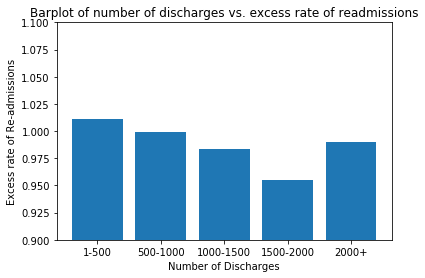

In [112]:
#A better way to visualize the above scatterplot will be a barplot

#Creating columns
group1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]['Excess Readmission Ratio'].mean()
group2 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 500) 
                                & (clean_hospital_read_df['Number of Discharges'] < 1000)]['Excess Readmission Ratio'].mean()
group3 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1000) 
                                & (clean_hospital_read_df['Number of Discharges'] < 1500)]['Excess Readmission Ratio'].mean()
group4 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 1500) 
                                & (clean_hospital_read_df['Number of Discharges'] < 2000)]['Excess Readmission Ratio'].mean()
group5 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 2000]['Excess Readmission Ratio'].mean()

#Plotting the barplot
plt.bar(np.arange(5), [group1, group2, group3, group4, group5])
plt.xticks(np.arange(5), ['1-500', '500-1000','1000-1500','1500-2000','2000+'])
plt.ylim(0.9, 1.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess rate of Re-admissions')
plt.title('Barplot of number of discharges vs. excess rate of readmissions')
plt.show()

Our pearson coefficient is a negative value that's very close to 0, which means that albeit being very weak, a negative correlation exists betweem number of discharges and the rate of re-admissions to hospitals. Thus, with a lower number of discharges, there is a greater incidence of excess readmission and vice versa.

### B. Statistics

+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

First, we confirm that those numbers are correct.

1.0226183501683506 1188 0.05797860323426279 0.6321548821548821


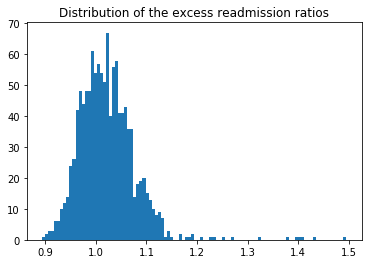

In [113]:
#Subsetting the table.
less = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
medium = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 100) & (clean_hospital_read_df['Number of Discharges'] < 1000)]
more = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

#In hospitals/facilities with number of discharges < 100
mean_less = less['Excess Readmission Ratio'].mean()
count_less = less['Excess Readmission Ratio'].count()
std_less = less['Excess Readmission Ratio'].std()
ratio_less = np.sum(less['Excess Readmission Ratio'] > 1)/len(less['Excess Readmission Ratio'])
print(mean_less, count_less, std_less, ratio_less)

#Plotting the distribution
plt.hist(less['Excess Readmission Ratio'], bins=100)
plt.title("Distribution of the excess readmission ratios")
plt.show()

Indeed, in hospitals/facilities with more than 100 discharges, mean excess readmission rate is 1.023. However, only 59% have excess readmission rate greater than 1. I graphed the data and also calculated the standard deviation, because they gave a better idea of the data distribution and it looks like most of the data is indeed greater than 1.

0.9783354211663071 463 0.12000735348224047 0.4449244060475162


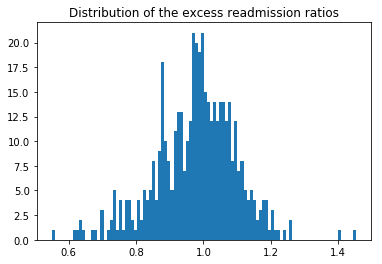

In [75]:
mean_more = more['Excess Readmission Ratio'].mean()
std_more = more['Excess Readmission Ratio'].std()
count_more = more['Excess Readmission Ratio'].count()
ratio_more = np.sum(more['Excess Readmission Ratio'] > 1)/len(more['Excess Readmission Ratio'])
print(mean_more, count_more, std_more, ratio_more)

plt.hist(more['Excess Readmission Ratio'], bins=100)
plt.title("Distribution of the excess readmission ratios")
plt.show()

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is indeed 0.978 and approximately 44% have excess readmission rate greater than 1. However, the standard deviation is quite large and a lot of the data is greater than 1.

### C. Conclusions

+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

In [79]:
#Determine if the two sections above are signficantly different from each other.
H0 = "There is no relationship between the number of discharges and the rate of readmissions."
H1 = "Hospitals with more discharges have a lesser readmission rate."

diff_obs = mean_less - mean_more
sem = np.sqrt(std_less**2/count_less + std_more**2/count_more)
z_score = diff_obs/sem
p_value = 1 - (stats.norm.cdf(z_score))
print("p = " + str(p_value))
if p_value < 0.01:
    print(H1)
else:
    print(H0)

p = 1.4654943925052066e-14
Hospitals with more discharges have a lesser readmission rate.


Our p-value is significantly less than 0.01, which would mean that hospitals with a higher number of discharges do indeed have a lesser readmission rate. Thus, the first bulletin point is true. Even though some would argue that 1.022 and 0.978 don't seem to be that far apart, perhaps this is a significant practical improvement. We do not have that information here. 

However, I have queries about the second bulletin point. While it is entirely possible that hospitals with a lower number of dicharges are smaller and may lack necessary resources, we do not know this for sure, because we do not know whether not not the number of discharges directly correlates with the size of the facilities. 

For example, perhaps hospitals with lower numbers of discharge and higher rates of re-admission are located in wealthy neighborhoods, where patients' insurance can afford longer hospital stays and frequent readmissions, and those with higher numbers of discharge and lower rates of readmission are located in poorer neighborhoods, where patients are discharged prematurely due to lack of insurance and cannot afford readmission. In fact, hospitals with high numbers of discharge can be smaller than those with a smaller number.

To ascertain whether there is direct correlation between readmission rates and hospital size, we could go back to the hospitals and ask them how many beds their hospitals have instead of merely speculating.

### D. Further advice

+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

Once again, we cannot say that these two bulletin points are true because we do not have evidence that smaller capacity correlates with worse outcomes. All we know is that hospitals with smaller re-admission rates tend to have a lot of patients discharged, and vice versa. And before we say that more discharges lead to less re-admissions, we would need to examine the cause-effect relationship: what if instead of one causing the other, they are both the result of hospitals not having enough beds? Or hospitals specializing in easily curable diseases that don't require many re-admissions? Those are all possible, and we need to collect more data before any recommendations can be made.